In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [12]:
data=pd.read_csv('Mall_Customers.csv')
data.head()
X=data.iloc[:,[3,4]].values

In [13]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


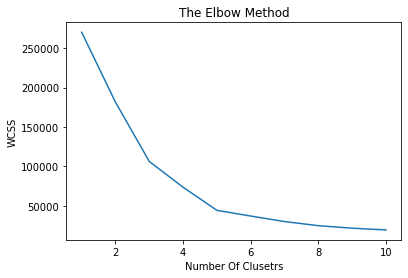

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusetrs')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

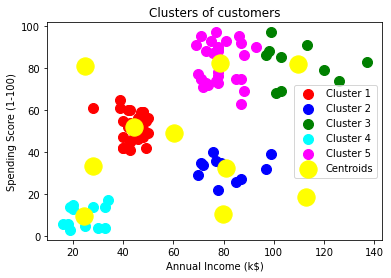

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score : %.3f'%score)

Silhouetter Score : 0.459


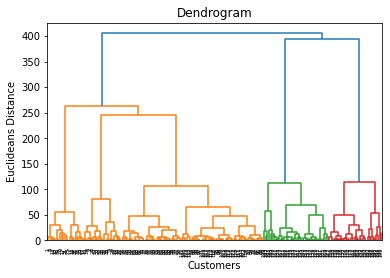

In [30]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclideans Distance')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

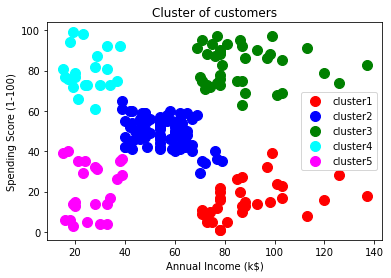

In [32]:
plt.scatter(X[y_hc == 0, 0],X[y_hc == 0, 1],s=100,c='red',label='cluster1')
plt.scatter(X[y_hc == 1, 0],X[y_hc == 1, 1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_hc == 2, 0],X[y_hc == 2, 1],s=100,c='green',label='cluster3')
plt.scatter(X[y_hc == 3, 0],X[y_hc == 3, 1],s=100,c='cyan',label='cluster4')
plt.scatter(X[y_hc == 4, 0],X[y_hc == 4, 1],s=100,c='magenta',label='cluster5')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()